<a href="https://colab.research.google.com/github/msrepo/ml-mscise-2023/blob/master/Dimensionality_Reduction/pca_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import transforms, pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn import datasets
import requests
import tensorflow as tf
from tensorflow import keras

In [42]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
nsamples, nrows, ncols = train_images.shape
X_train = np.reshape(train_images, (nsamples, nrows * ncols))
ndx = np.arange(nsamples)
X_train = X_train[ndx,:]
y_train = train_labels[ndx]

In [45]:
n_samples, n_features = X_train.shape
print(X_train.shape)
img_size = int(np.sqrt(n_features))

SUBSET_LABEL = 3
idx_subset = np.where(y_train == SUBSET_LABEL)[0]
X_train_subset = X_train[idx_subset]
X_train_subset_pca = PCA(n_components=2).fit_transform(X_train_subset)
x_grid = np.percentile(X_train_subset_pca[:, 0], [5,25,50, 75, 95])
y_grid = np.percentile(X_train_subset_pca[:, 1], [5,25, 50, 75, 95])
x_grid[2], y_grid[2] = 0,0

(60000, 784)


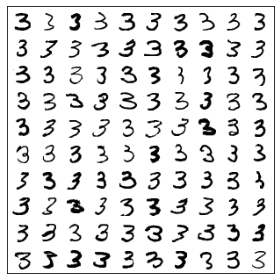

In [59]:
NUM_IMG = 10
IMG_W = 30

img = np.zeros(shape=(4 + IMG_W * NUM_IMG, 4 + IMG_W * NUM_IMG))
for i in range(10):
  for j in range(10):
    idx = np.random.randint(low=0,high = X_train_subset.shape[0])
    img[
        j * IMG_W + 4 : j * IMG_W + 4 + img_size,
        i * IMG_W + 4 : i * IMG_W + 4 + img_size
      ] = -X_train_subset[idx].reshape((img_size, img_size)) 

fig, ax = plt.subplots(1)
ax.tick_params(bottom=False, labelbottom=False, 
               left=False, labelleft=False)
ax.imshow(img,cmap='gray')
plt.tight_layout()
plt.show()   

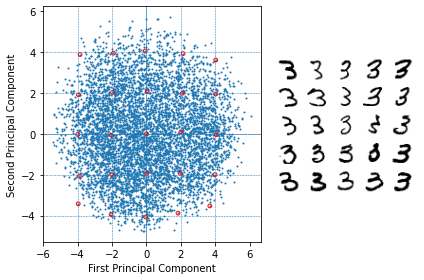

In [60]:
fig, axarr = plt.subplots(1,2,gridspec_kw=dict(width_ratios=[3,2]))
plt.subplots_adjust(wspace=0.1)
for s in axarr[1].spines.values():
  s.set_visible(False)
ax = axarr[0]
ax.scatter(X_train_subset_pca[:, 0], X_train_subset_pca[:, 1], 
           s=1)
ax.axhline(0, linewidth=0.5)
ax.axvline(0, linewidth=0.5)
for i in range(5):
  ax.axhline(y_grid[i], linewidth=0.5, linestyle='--')
  ax.axvline(x_grid[i], linewidth=0.5, linestyle='--')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
IMG_W = 30
NUM_IMG = 5
img = np.zeros(shape=(4 + IMG_W * NUM_IMG, 4 + IMG_W * NUM_IMG))
x_grid = np.linspace(-4,4,5,endpoint=True)
y_grid = np.linspace(-4,4,5,endpoint=True)
for i in range(NUM_IMG):
  for j in range(NUM_IMG):
    v = X_train_subset_pca - np.array([x_grid[i], y_grid[j]])
    v = np.sqrt(np.sum(v**2, axis=-1))
    idx = np.argmin(v)

    ax.scatter(
        X_train_subset_pca[idx : idx + 1, 0],
        X_train_subset_pca[idx : idx + 1, 1],
        s = 14,
        facecolors="none",
        edgecolors="r",
        linewidth=1
    )
    img[
        j * IMG_W + 4 : j * IMG_W + 4 + img_size,
        i * IMG_W + 4 : i * IMG_W + 4 + img_size
      ] = -X_train_subset[idx].reshape((img_size, img_size))

ax = axarr[1]
ax.tick_params(bottom=False, labelbottom=False, 
               left=False, labelleft=False)
ax.imshow(img,cmap='gray')
plt.tight_layout()
plt.show()